In [2]:
######### GET & VISUALIZE THE DATA  ###########

In [3]:
#importing sys module + version to access python runtime Env variables and function

import sys
assert sys.version_info >= (3, 7)

In [4]:
#importing skit-learn libaray and checks for at least version 1.0.1

from packaging import version
import sklearn #Having problems finding module on 'sklearn' you may need to install the sklearn kernal
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [5]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data(): #funtion to fetch and load data
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file(): #if it does not find the housing file it creates the dataset directory in
        #current directory by default and and loads housing data into a pandas DataFrame named housing
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [6]:
#displaying displays the first five rows of the housing DataFrame
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#counting how many times each unique value appears in the "ocean_proximity" column of the dataset
housing["ocean_proximity"].value_counts()

#providing summary of dataset: coumn names, data type, memory usage
housing.info()

#counting the # of occurrences of each unique value in the "ocean_proximity" column
housing["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#providing statistical summaries: mean, median, standard deviation, etc.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
import matplotlib.pyplot as plt #importing plot library / GIO- Added this because plt was undefined.
# extra code to save the figures as high-res PNGs for the book


IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

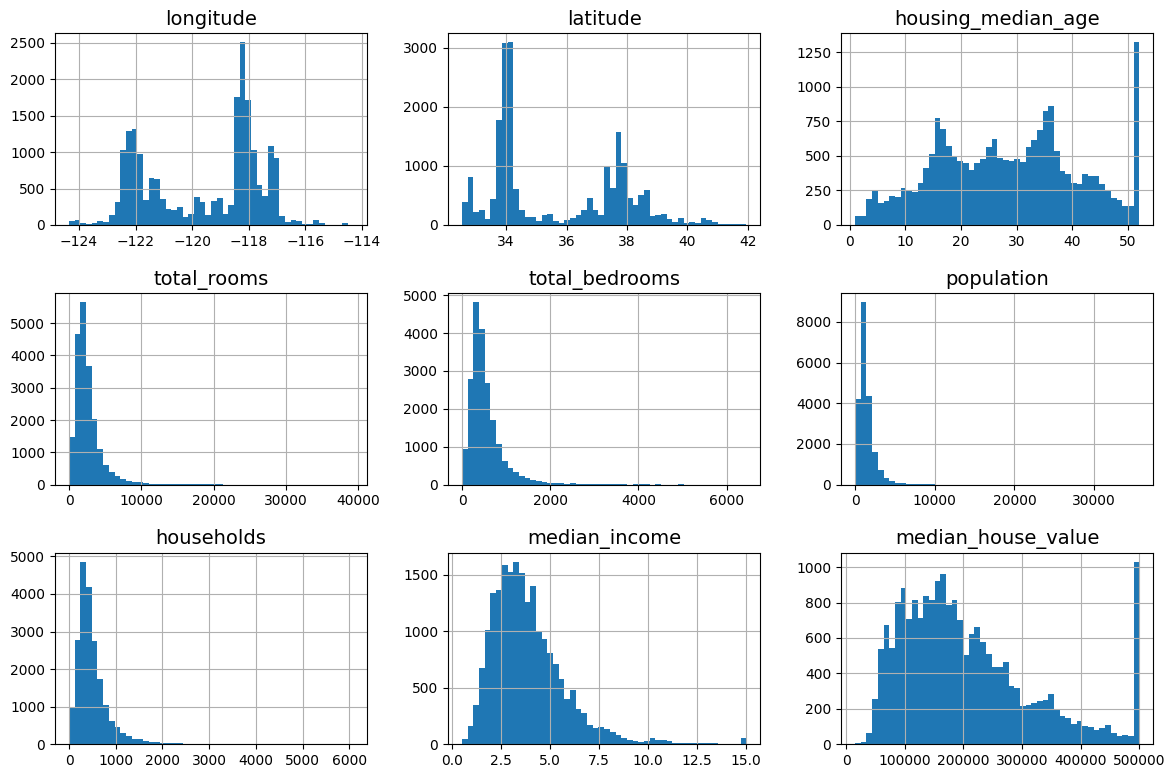

In [10]:

import matplotlib.pyplot as plt #importing plot library

# extra code the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8)) #creating historgram for all numeric columns 
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [11]:
######### CREATING THE TEST SET ############

In [12]:
import numpy as np #Starting to train the test set

#this portion shuffles and splits the data
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
#this trains it
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [14]:
#this checks length of test set
len(test_set)
np.random.seed(42)

In [15]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [16]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] #adds unique identifier, a districts latitude and longitude are guaranteed to be stable
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [18]:
'''
(Commentator- Gio)
Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), 
which does pretty much the same thing as the shuffle_and_split_data() function we defined earlier, with a couple of additional features.
'''

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
test_set["total_bedrooms"].isnull().sum()

44

In [26]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

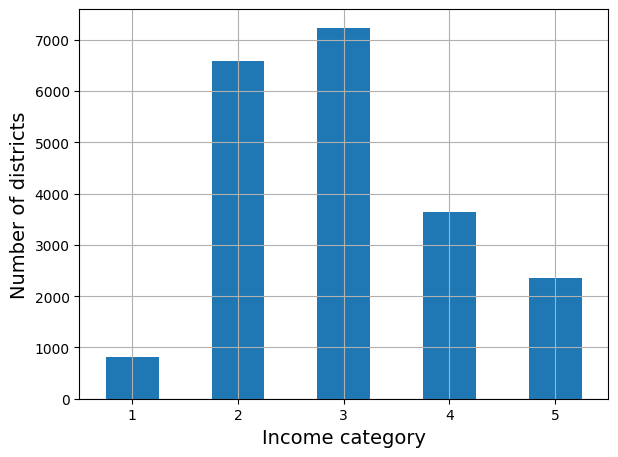

In [27]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [28]:
#(Commentator- Gio)the following code generates 10 different stratified splits of the same dataset

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [29]:
#(Commentator- Gio)you can just use the first split
strat_train_set, strat_test_set = strat_splits[0]

In [31]:
"""
(Commentator- Gio)
Or, since stratified sampling is fairly common, there is a shorter way to get a single split 
using the train_test_split() function with the stratify argument:
"""

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [32]:
"""
(Commentator- Gio)
Dropping income_cat column since we won't use it again
"""

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [33]:
"""
(Commentator- Gio)
This portion is to explore and visualize the data to gain insights. 
The goal is to go into a little more depth.
"""
housing = strat_train_set.copy() #creates a copy to revert to

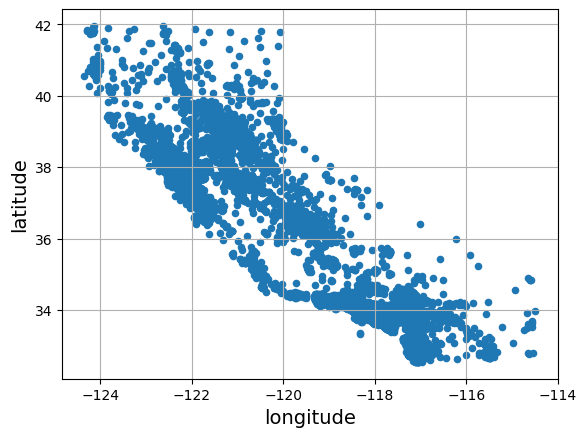

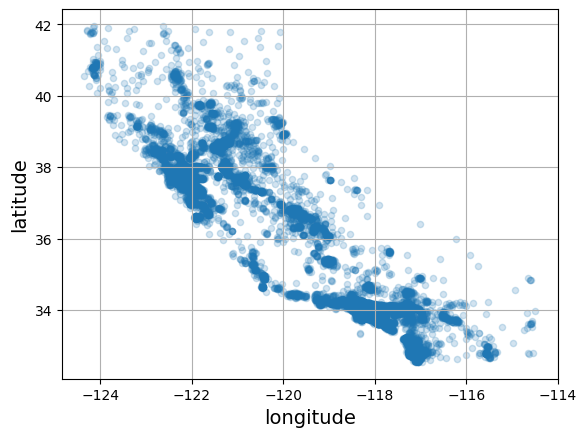

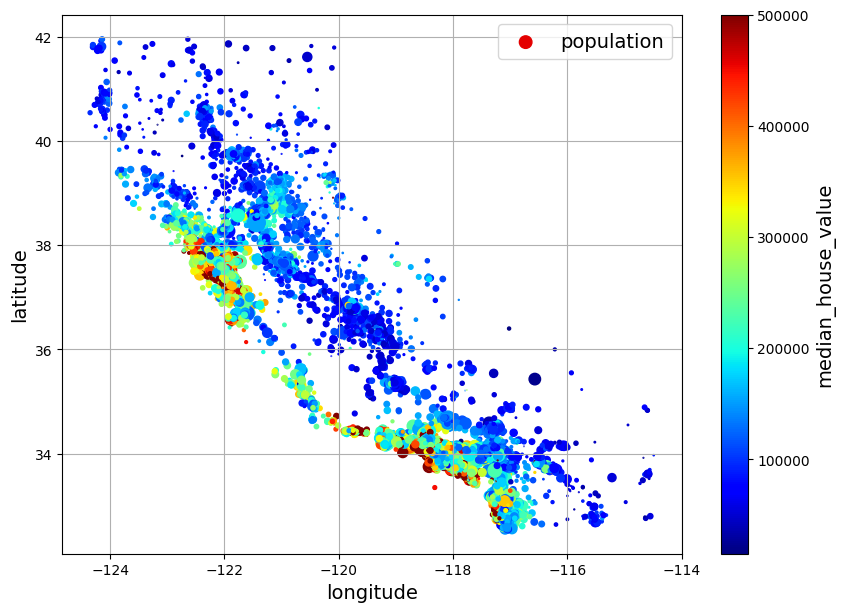

In [36]:
#(commentator-Gio) This creates a scatter plot of the data

#version 1
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

#version 2 - changed alpha to .2 to make it easier to see patterns
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

#version 3 - changed other attributes to recognize patterns in data furhter
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [37]:
"""
(commentator - Gio)
This computes the standard correlation coefficient (also called Pearsons r) between every pair of attributes using the corr() method
"""

corr_matrix = housing.corr()

C:\Users\GioDude\AppData\Local\Temp\ipykernel_26372\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [38]:
#We are trying to look at how much each attribute correlates with the median house value.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

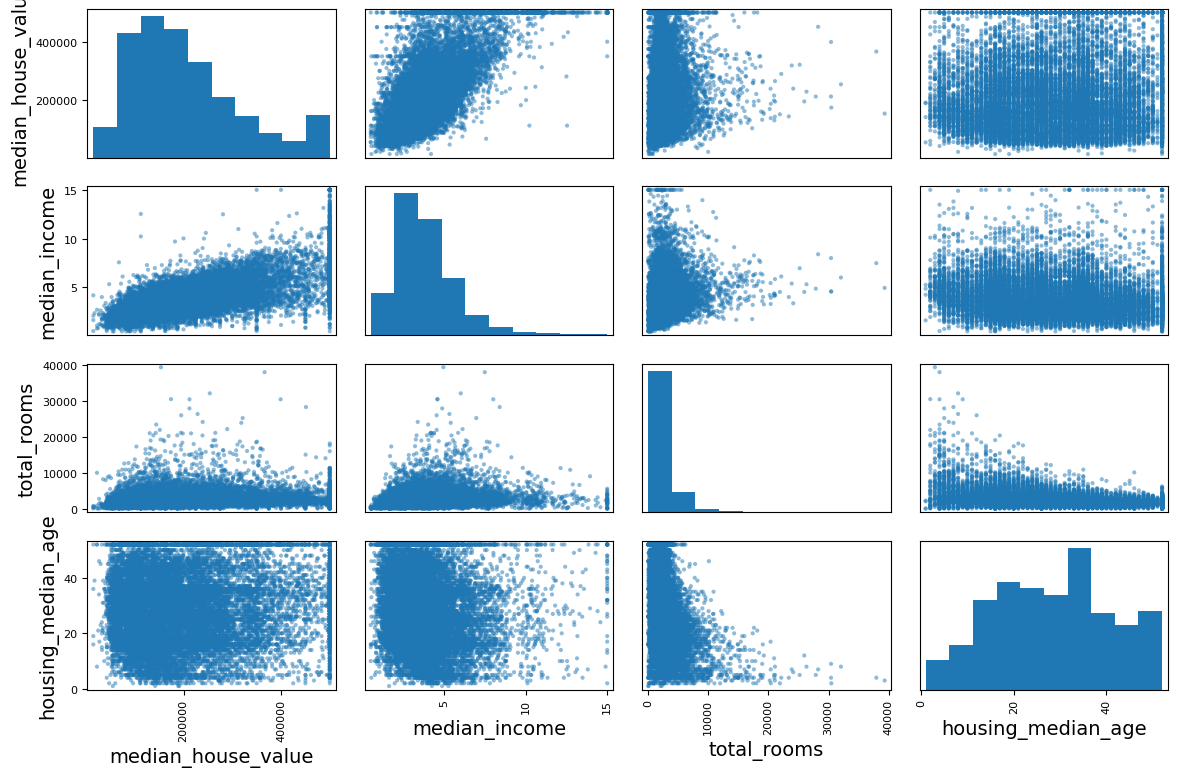

In [39]:
"""
(commentator - Gio)
 plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 112 = 121 plots, 
 which would not fit on a page—so you decide to focus on a few promising attributes that seem most correlated with the median housing value

"""

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

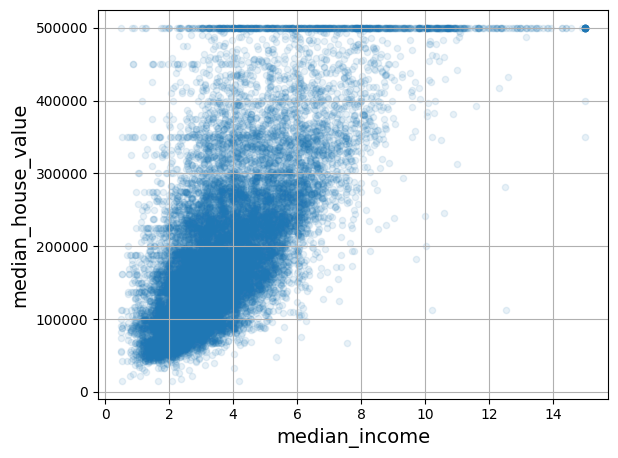

In [40]:
# the most promising attribute to predict the median house value is the median income
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

"""
(Commentator - Gio)
IMPORTANT OVERVIEW OF THE CHART BELOW
First, the correlation is indeed quite strong; you can clearly see the upward trend, and the points are not too dispersed. 
Second, the price cap you noticed earlier is clearly visible as a horizontal line at $500,000. But the plot also reveals other 
less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few more below that. 
You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.
"""

In [41]:
#Experimenting with Attribute Combinations - Extra code
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\GioDude\AppData\Local\Temp\ipykernel_26372\315194601.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [43]:
"""
Prepare the Data for Machine Learning Algorithms:
This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).

You will gradually build a library of transformation functions that you can reuse in future projects.

You can use these functions in your live system to transform the new data before feeding it to your algorithms.

This will make it possible for you to easily try various transformations and see which combination of transformations works best.

"""

'\nPrepare the Data for Machine Learning Algorithms:\nThis will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).\n\nYou will gradually build a library of transformation functions that you can reuse in future projects.\n\nYou can use these functions in your live system to transform the new data before feeding it to your algorithms.\n\nThis will make it possible for you to easily try various transformations and see which combination of transformations works best.\n\n'

In [42]:
"""
(Commentator- Gio) FROM TEXTBOOK
Let's revert to the original training set and separate the target (note that strat_train_set.drop() 
creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, 
unless you pass inplace=True):
"""

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
"""
total_bedrooms attribute has some missing values
You can accomplish these easily using the Pandas DataFrames dropna(), drop(), and fillna() methods
You have three options to fix this:

1. Get rid of the corresponding districts.
housing.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

2. Get rid of the whole attribute.
housing.drop("total_bedrooms", axis=1)  # option 2

3. Set the missing values to some value (zero, the mean, the median, etc.). This is called imputation.
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

!Textbook Choice - You decide to go for option 3 since it is the least destructive, 
but instead of the preceding code, you will use a handy Scikit-Learn class: SimpleImputer.
"""

In [45]:
#option 3 modified
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [46]:
#create a copy of the data with only the numerical attributes
housing_num = housing.select_dtypes(include=[np.number])

In [47]:
#fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [50]:
#Reference for imputer.statistics_ , checks manually to make sure they match
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [51]:
#Transform the training set:

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

"""
(Commentator - Gio)
SO I do not like this portion stated in the google collab, from what I can tell this is additional changes that arent needed
Also null_rows_idx throws an error


imputer.feature_names_in_

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.loc[null_rows_idx].head()

imputer.strategy

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.loc[null_rows_idx].head()  # not shown in the book
"""


NameError: name 'null_rows_idx' is not defined